<a href="https://colab.research.google.com/github/riyaz7781/riyaz7781/blob/main/Decision_tree(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary Libraries

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [ ]:
data1=pd.read_csv("/content/Company_Data.csv")
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Basic EDA

In [ ]:
data1.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [68]:
data1.Sales.unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

Label Encoding for Categorical Values

In [ ]:
label=LabelEncoder()
data1["ShelveLoc"]=label.fit_transform(data1["ShelveLoc"])
data1["Urban"]=label.fit_transform(data1["Urban"])
data1["US"]=label.fit_transform(data1["US"])
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


Selecting Independent and Target Values

In [ ]:
x=data1.drop(["ShelveLoc"],axis=1)
y=data1[["ShelveLoc"]]
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [ ]:
y.tail()

,ShelveLoc
395,1
396,2
397,2
398,0
399,1


Splitting the dataset into Train-Test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

# **ENTROPY CRITERIA**

In [ ]:
model1=DecisionTreeClassifier(criterion="entropy",max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5, 0.9, 'x[0] <= 6.07\nentropy = 1.431\nsamples = 268\nvalue = [66, 53, 149]'),
 Text(0.21153846153846154, 0.7, 'x[2] <= 31.5\nentropy = 1.125\nsamples = 96\nvalue = [46, 2, 48]'),
 Text(0.07692307692307693, 0.5, 'x[3] <= 5.5\nentropy = 0.391\nsamples = 13\nvalue = [1, 0, 12]'),
 Text(0.038461538461538464, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11]'),
 Text(0.11538461538461539, 0.3, 'x[0] <= 4.84\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.07692307692307693, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.15384615384615385, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.34615384615384615, 0.5, 'x[5] <= 133.5\nentropy = 1.131\nsamples = 83\nvalue = [45, 2, 36]'),
 Text(0.2692307692307692, 0.3, 'x[1] <= 115.5\nentropy = 0.918\nsamples = 54\nvalue = [36, 0, 18]'),
 Text(0.23076923076923078, 0.1, 'entropy = 0.985\nsamples = 21\nvalue = [9, 0, 12]'),
 Text(0.3076923076923077, 0.1, 'entropy = 0.684\nsamples = 33\nvalue = [27, 0,

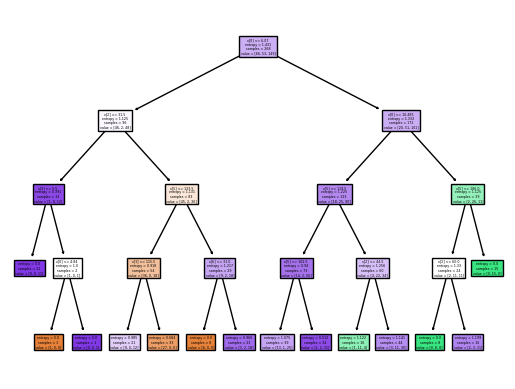

In [ ]:
tree.plot_tree(model1,filled=True)

In [ ]:
pred1=model1.predict(x_test)
pred1

array([0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
np.mean(pred1==y_test)

0.46567952249770433

# **GINI CRITERIA**

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [54]:
model2=DecisionTreeClassifier(criterion="gini",max_depth=4)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [56]:
pred2=model2.predict(x_test)
pred2

array([0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2])

# **DECISION TREE USING REGRESSION**

In [65]:
x1=data1.iloc[:,0:6]
y1=data1.iloc[:,6]
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.33,random_state=42)

In [66]:
model3=DecisionTreeRegressor()
model3.fit(x_train,y_train)

DecisionTreeRegressor()

In [67]:
model3.score(x_test,y_test)

-0.9458620689655173